In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('absenteeism_0.csv')
df

,Transportation_expense,Distance_from_Residence_to_Work,Age,Abs_cat
0,289,36,33,Abs_Med
1,118,13,50,Abs_low
2,179,51,38,Abs_low
3,279,5,39,Abs_Med
4,289,36,33,Abs_low
...,...,...,...,...
735,289,36,33,Abs_High
736,235,11,37,Abs_Med
737,118,14,40,Abs_low
738,231,35,39,Abs_low


In [3]:
# Drop any rows with missing values
df.dropna(inplace=True)

In [4]:
# Remove the "Abs_cat" column from the dataset
X = df.drop(columns=['Abs_cat'])

In [5]:
# Perform hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)

In [6]:
# Perform K-means clustering
kmeans_clustering = KMeans(n_clusters=3, random_state=0).fit(X)

In [7]:
# Add the cluster labels to the original dataset
df['Cluster_agg'] = agg_clustering.labels_
df['Cluster_kmeans'] = kmeans_clustering.labels_

In [8]:
# Print the first few rows of the dataset with the cluster labels
print(df.head())

   Transportation_expense  Distance_from_Residence_to_Work  Age  Abs_cat  \
0                     289                               36   33  Abs_Med   
1                     118                               13   50  Abs_low   
2                     179                               51   38  Abs_low   
3                     279                                5   39  Abs_Med   
4                     289                               36   33  Abs_low   

   Cluster_agg  Cluster_kmeans  
0            1               1  
1            0               0  
2            0               0  
3            1               1  
4            1               1  


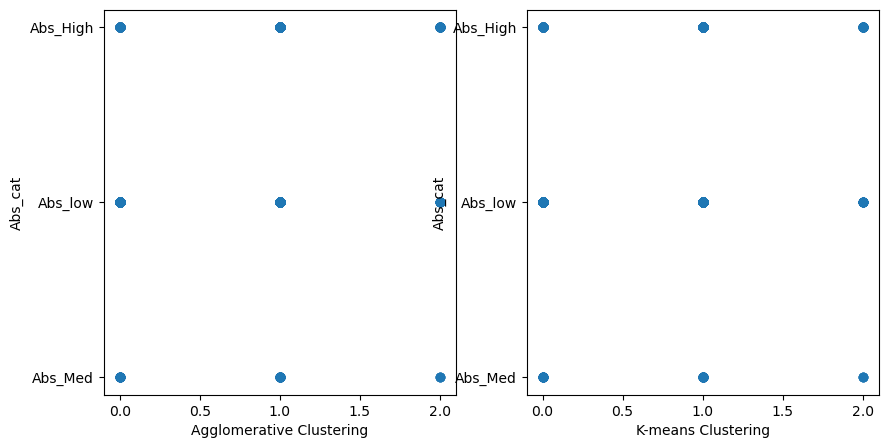

In [9]:
# Plot the clusters against the original "Abs_cat" variable
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].scatter(df['Cluster_agg'], df['Abs_cat'])
axs[0].set_xlabel('Agglomerative Clustering')
axs[0].set_ylabel('Abs_cat')
axs[1].scatter(df['Cluster_kmeans'], df['Abs_cat'])
axs[1].set_xlabel('K-means Clustering')
axs[1].set_ylabel('Abs_cat')
plt.show()

In [10]:
# Calculate the centroids of each K-means cluster
centroids = kmeans_clustering.cluster_centers_
print("Centroids:")
print(pd.DataFrame(centroids, columns=X.columns))

Centroids:
   Transportation_expense  Distance_from_Residence_to_Work        Age
0              159.349845                        29.544892  37.263158
1              252.555556                        29.025641  36.792023
2              358.590909                        33.272727  30.651515
